<a href="https://colab.research.google.com/github/gabriel-klein/AV2-Gest-o-do-Conhecimento/blob/main/C%C3%B3pia_de_2021_1_Prova_AV2_Gesta%CC%83o_do_Conhecimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DISCIPLINA: Gestão do Conhecimento	 PROFESSOR(A): Alex Salgado
PERÍODO: 7o. TURNO: noite AVALIAÇÃO:

ALUNO(A): Gabriel Nunes Klein e João Victor Da Cruz Silva



GRAU: VISTO DO PROFESSOR:


# Questão 1 - valor (0,0)


*** Crie um repositório no Github e adicione este arquivo no mesmo


1.1 - Você deve escolher uma base de dados do Kaggle.

A natureza desse dataset deve se encaixar em um problema que podemos resolver utilizando modelos de previsão de machine learning supervisionado de classificação. 

A partir desta base de dados do Kaggle, você vai treinar o modelo, fazer previsões e calcular a acurácia do mesmo, usando modelos e algoritmos que desejar.

Obs1: Usar o Kaggle como fonte para o seu dataset obrigatoriamente.
Obs2: Implementações idênticas ou bem parecidas pode levar a anulação da NOTA ou seja, ZERO!! Faça o melhor com sua equipe apenas.


1.1 - Coloque aqui o link para o seu dataset escolhido no Kaggle.



https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

1.1.1 - Descreva sobre o que é base de dados.

###About this dataset
- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack

1.1.2 - Se você fez em grupo, quais os nomes dos componentes do seu grupo?

Gabriel Nunes Klein e João Victor Da Cruz Silva

1.2 - Após tratada, criar uma pasta no seu GoogleDrive e disponibilizar o link do arquivo de sua base (csv, xlsx, etc) para ser importado no seu código.

https://github.com/gabriel-klein/AV2-Gest-o-do-Conhecimento/blob/main/heart.csv

## Criar um código usando o Jupyter Notebook e responder (através de código) às seguintes questões:


# Questão 2 - valor (0,5)

2.1 - Importar os modulos python para machine learn e carregar o arquivo 

** Sugestão se for do tipo xlsx, usar o read_excel do pandas
import pandas as pd
dt = pd.read_excel("meuarquivo.xlsx")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

hearth = pd.read_csv('https://raw.githubusercontent.com/gabriel-klein/AV2-Gest-o-do-Conhecimento/main/heart.csv')

2.2 - Exibir os primeiros registros desta tabela.


In [ ]:
hearth.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


2.3 - De que se trata esse banco de dados? e que tipo de previsão pode ser feito com ele?


In [ ]:
São dados de pessoas que já tiveram ataques cardíacos. Podemos tentar prever se uma pessoa já teve um ataque cardíaco ou se
possui muita chance de ter um.

# Questão 3 - valor (1,5)


Utilizando as terminologias de Machine Learning(features e observações):



3.1 - Quantas "features" têm nessa base de dados?

In [ ]:
13

13

3.2 - Quantas observações têm nessa base de dados?


In [ ]:
303

3.3 - Separe o que é entrada (features) do seu dataset na variável X, e exiba.

In [ ]:
features_col = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = hearth[features_col]
X.head

     age  sex  cp  trtbps  chol  fbs  ...  thalachh  exng  oldpeak  slp  caa  thall
0     63    1   3     145   233    1  ...       150     0      2.3    0    0      1
1     37    1   2     130   250    0  ...       187     0      3.5    0    0      2
2     41    0   1     130   204    0  ...       172     0      1.4    2    0      2
3     56    1   1     120   236    0  ...       178     0      0.8    2    0      2
4     57    0   0     120   354    0  ...       163     1      0.6    2    0      2
..   ...  ...  ..     ...   ...  ...  ...       ...   ...      ...  ...  ...    ...
298   57    0   0     140   241    0  ...       123     1      0.2    1    0      3
299   45    1   3     110   264    0  ...       132     0      1.2    1    0      3
300   68    1   0     144   193    1  ...       141     0      3.4    1    2      3
301   57    1   0     130   131    0  ...       115     1      1.2    1    1      3
302   57    0   1     130   236    0  ...       174     0      0.0    1    1

3.4 - Separe o que é saída (target/resposta) do seu dataset na variável y, e exiba.

In [ ]:
y = hearth['output']
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64>

# Questão 4 - valor (1,5)


4.1 - Utilizando a sua base, faça um treinamento e uma previsão, usando o algoritmo de clsssificação de sua escolha.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# Questão 5 - valor (1,5)





In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.6147540983606558


Usando o método de avaliação de acurácia (Train test split), Escolha outros 2 algoritmos de classificação e calcule a acurácia dos mesmos.

5.2 - Acurácia usando o algoritmo 1 ?


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6721311475409836


5.3 - Acurácia usando o algoritmo 2 ?





In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8114754098360656


5.4 - De acordo com seus resultados anteriores, qual dos 2 algoritmos é mais eficiente?


O melhor algoritimo é o de Regreção Logística

# Questão 6 - valor (1,5)



6 - Faça um visualização auto-explicativa da sua base de dados utilizando o matplotlib. Coloque o código e a visualização abaixo.


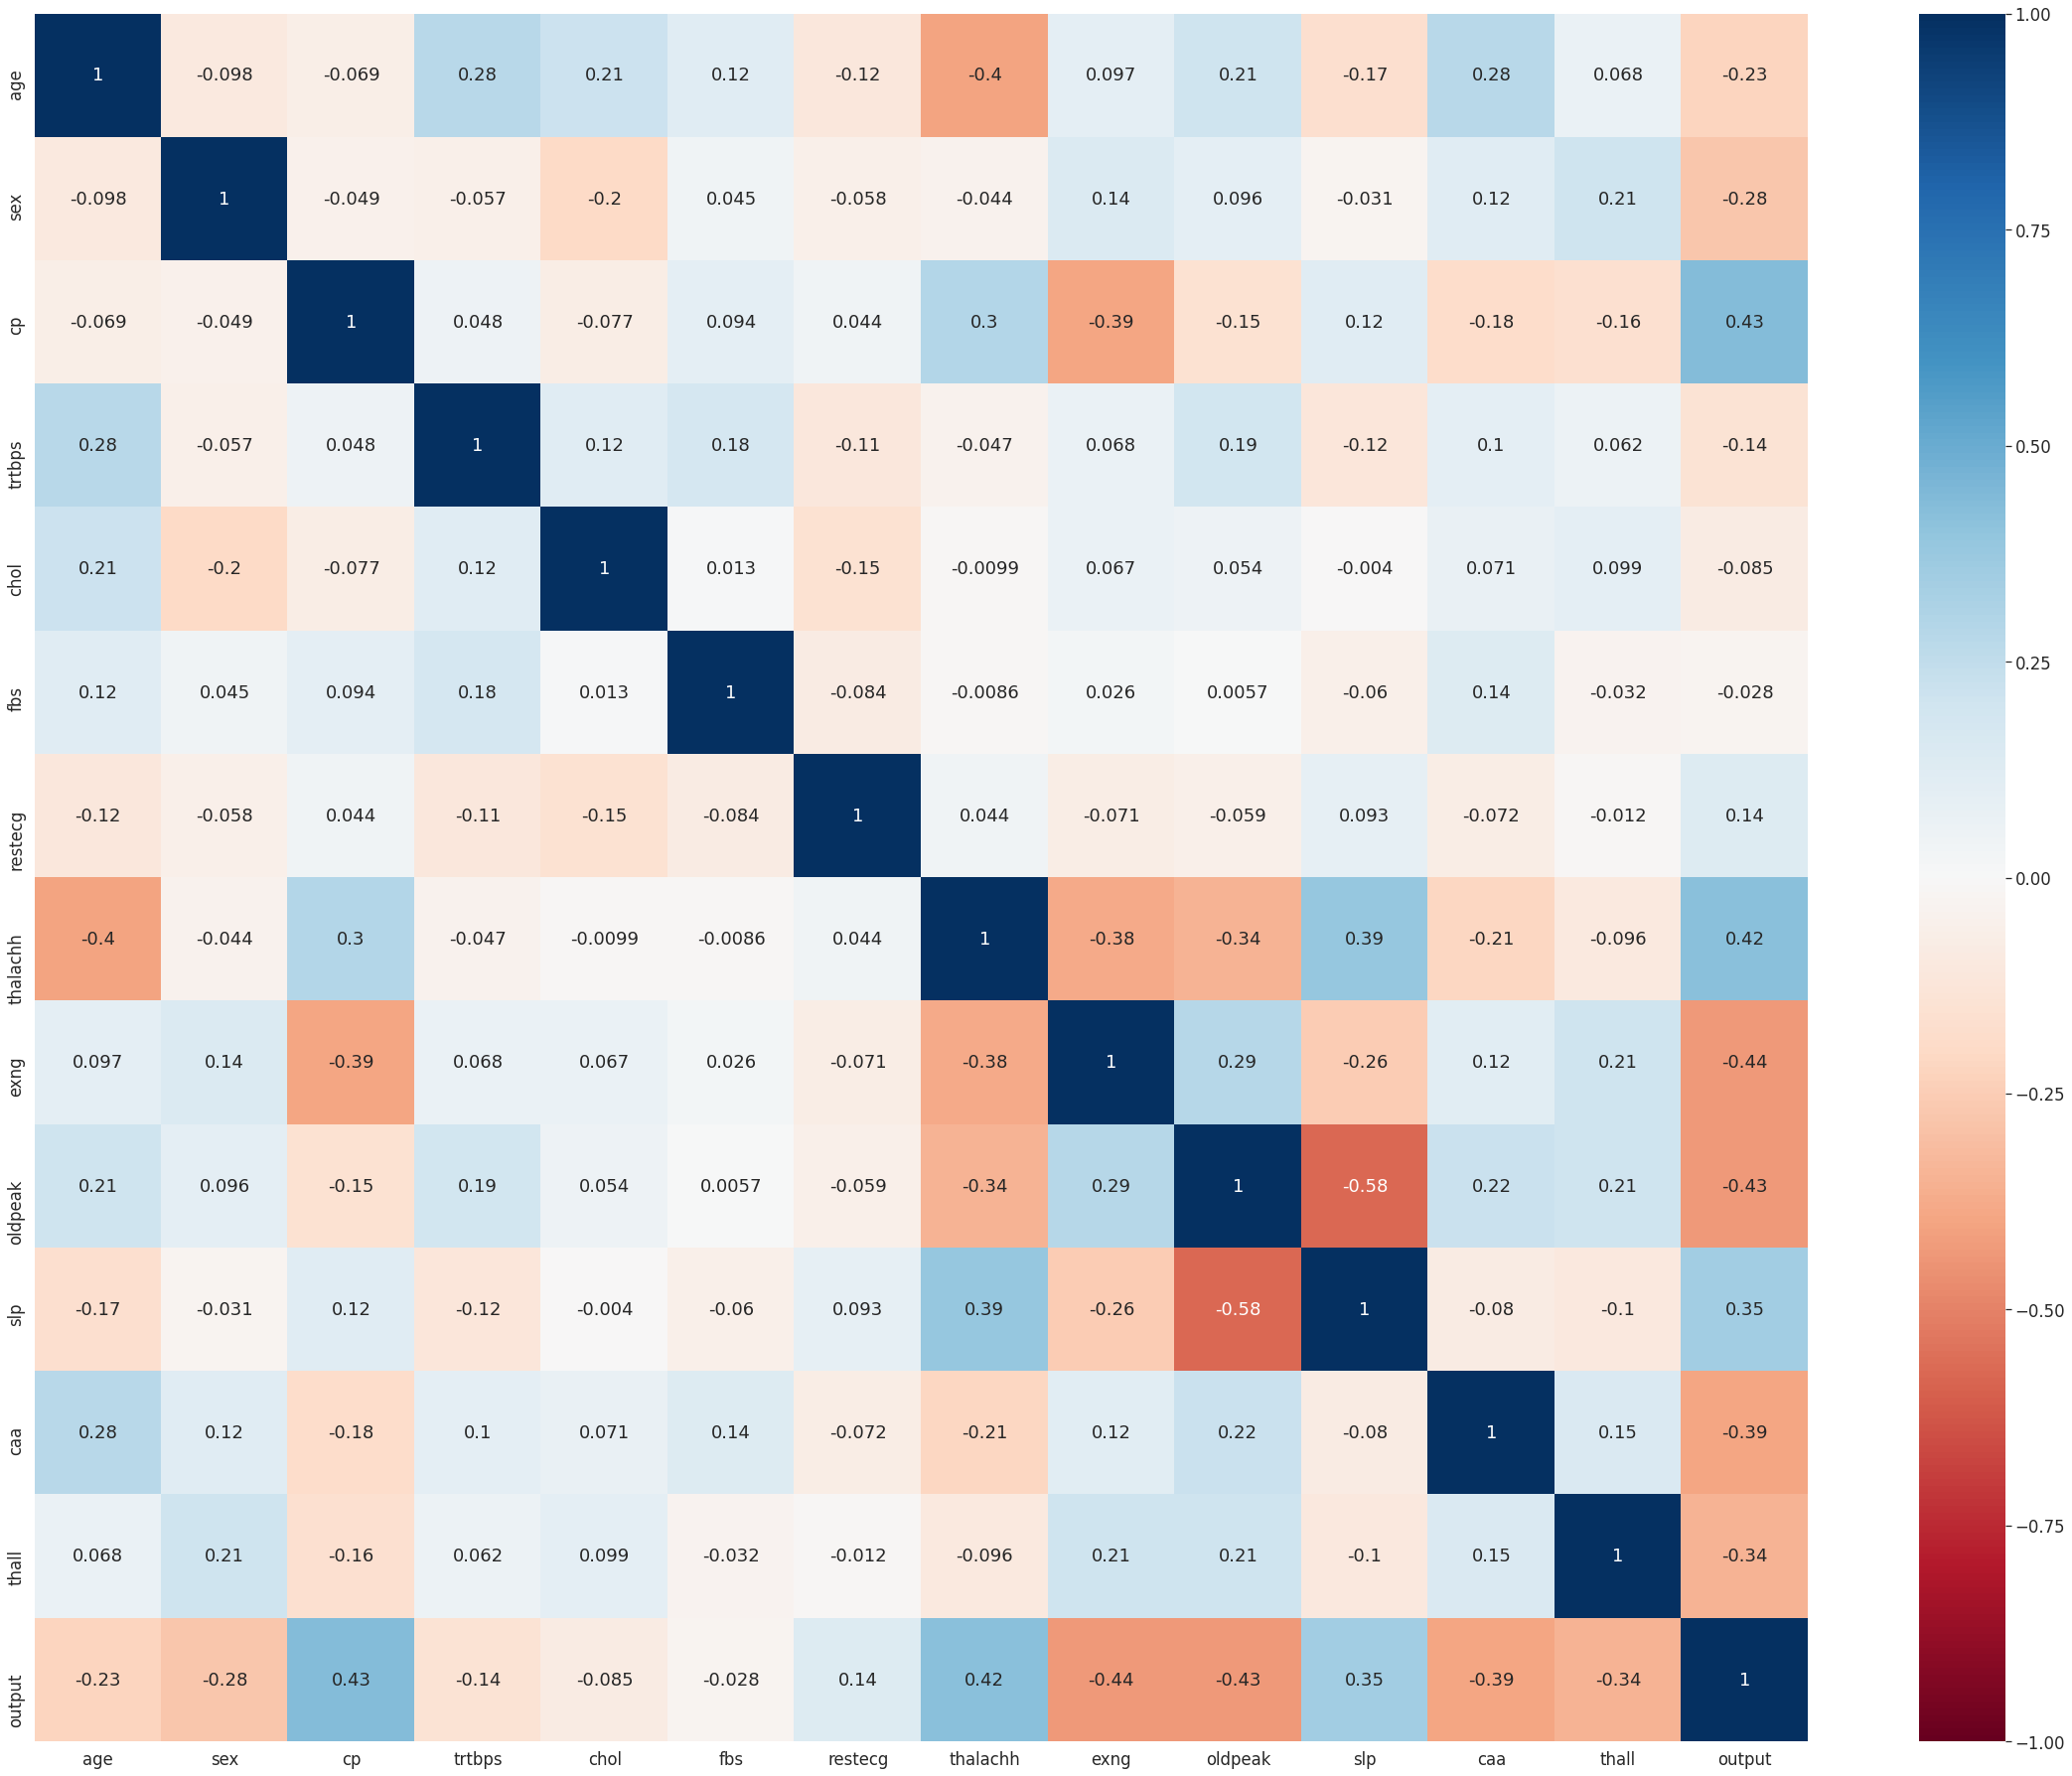

In [ ]:
hearth_cor = hearth.corr()    # Calcula o coeficiente de correlação enrre as variáveis, o default é o coeficente linear
plt.figure(figsize=(40,32))       # tamanho da figura
sns.heatmap(hearth_cor,cmap = "RdBu", vmin= -1, annot = True)

As colunas cp, slp e thalach são as que mais influenciam o valor do output

In [ ]:
*** Envie o link do seu Github com essa resposta no Classroom
